In [26]:
# https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/colab_datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [27]:
df.shape

(284807, 31)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [29]:
df.isnull().sum()

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [30]:
df.value_counts('Class')

,count
Class,
0,284315
1,492


In [31]:
fraud = df[df['Class'] == 1]
normal = df[df['Class'] == 0]

In [32]:
fraud.shape, normal.shape

((492, 31), (284315, 31))

In [33]:
fraud['Amount'].describe()

,Amount
count,492.000000
mean,122.211321
std,256.683288
min,0.000000
25%,1.000000
50%,9.250000
75%,105.890000
max,2125.870000


In [34]:
normal['Amount'].describe()

,Amount
count,284315.000000
mean,88.291022
std,250.105092
min,0.000000
25%,5.650000
50%,22.000000
75%,77.050000
max,25691.160000


In [35]:
# Dataset is imbalansed, then we must select an equal number of classes
df.value_counts('Class')

,count
Class,
0,284315
1,492


In [36]:
normal = normal.sample(492)
df = pd.concat([normal, fraud], axis=0)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
94400,64868.0,-1.399553,1.540586,0.412191,0.169280,-0.248342,0.031838,-0.140064,-0.021801,-0.284963,...,0.628696,-0.726237,0.074061,-0.467853,0.143129,-0.690773,-0.220546,-0.126064,28.27,0
43774,41646.0,-0.729593,0.545801,2.333011,0.219621,0.117100,0.564967,0.201133,0.205186,-0.041312,...,0.116882,0.371324,-0.222998,-0.356576,-0.197525,-0.464830,-0.157479,-0.110507,18.92,0
156021,107042.0,1.990933,-0.116359,-0.135477,0.535469,-0.570100,-0.701918,-0.518761,-0.185000,2.543234,...,-0.257652,-0.328320,0.366128,-0.121717,-0.391188,-0.961146,0.038476,-0.032770,2.12,0
46019,42606.0,1.162301,-0.441040,0.883967,0.427276,-0.892888,0.257678,-0.757259,0.159563,-1.149303,...,-0.138919,0.072848,-0.003794,0.006163,0.298020,-0.292812,0.080832,0.030930,39.00,0
54148,46306.0,-1.220291,0.235507,1.102163,-2.109882,-0.263052,-0.538653,0.176440,0.454932,0.451383,...,0.067392,-0.081783,-0.123955,-0.442114,0.345825,-0.029343,-0.074774,-0.050116,67.94,0


In [37]:
df.value_counts('Class')

,count
Class,
0,492
1,492


In [38]:
X = df.drop(columns='Class', axis=1)
Y = df['Class']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

scaler = ColumnTransformer(
    transformers=[
        ('scale_amount', StandardScaler(), ['Amount'])
    ],
    remainder='passthrough'
)

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [42]:
collection = []
LR = LogisticRegression(max_iter=1000)
LR.fit(X_train, Y_train)
LR_pred = LR.predict(X_test)
collection.append(LR_pred)

KNN = KNeighborsClassifier()
KNN.fit(X_train, Y_train)
KNN_pred = KNN.predict(X_test)
collection.append(KNN_pred)

param_grid_decision = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 5, 10],
    'criterion': ['gini', 'entropy']
}
# GridSearchCV
grid_search_decision = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid_decision,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_decision.fit(X_train, Y_train)
best_params1 = grid_search_decision.best_params_
best_dt_model = DecisionTreeClassifier(**best_params1, random_state=42)
best_dt_model.fit(X_train, Y_train)
dt_best_pred = best_dt_model.predict(X_test)
collection.append(dt_best_pred)

param_grid_random = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'criterion': ['gini', 'entropy']
}
# GridSearchCV
grid_search_random = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_random,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_random.fit(X_train, Y_train)
best_params_random = grid_search_random.best_params_
best_rf_model = RandomForestClassifier(**best_params_random, random_state=42)
best_rf_model.fit(X_train, Y_train)
rf_best_pred = best_rf_model.predict(X_test)
collection.append(rf_best_pred)

param_grid_gradient = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 3]
}
# GridSearchCV
grid_search_gradient = GridSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_grid=param_grid_gradient,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_gradient.fit(X_train, Y_train)
best_params_gradient = grid_search_gradient.best_params_
best_gb_model = GradientBoostingClassifier(**best_params_gradient, random_state=42)
best_gb_model.fit(X_train, Y_train)
gb_best_pred = best_gb_model.predict(X_test)
collection.append(gb_best_pred)

param_grid_ada = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1.0]
}
dt_for_AdaBoost = DecisionTreeClassifier(**best_params1, random_state=42)
# GridSearchCV
grid_search_ada = GridSearchCV(
    estimator=AdaBoostClassifier(random_state=42, estimator = dt_for_AdaBoost),
    param_grid=param_grid_ada,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_ada.fit(X_train, Y_train)
best_params_ada = grid_search_ada.best_params_
best_ab_model = AdaBoostClassifier(**best_params_ada, estimator=dt_for_AdaBoost, random_state=42)
best_ab_model.fit(X_train, Y_train)
ab_best_pred = best_ab_model.predict(X_test)
collection.append(ab_best_pred)

param_grid_svc = {
    'C': [0.1, 1, 10],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto']
}
# GridSearchCV
grid_search_svc = GridSearchCV(
    estimator=SVC(random_state=42),
    param_grid=param_grid_svc,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_svc.fit(X_train, Y_train)
best_params_svc = grid_search_svc.best_params_
best_svc_model = SVC(**best_params_svc, random_state=42)
best_svc_model.fit(X_train, Y_train)
svc_best_pred = best_svc_model.predict(X_test)
collection.append(svc_best_pred)

param_grid_lgbm = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [15, 31, 63]
}
# GridSearchCV
grid_search_lgbm = GridSearchCV(
    estimator=LGBMClassifier(random_state=42),
    param_grid=param_grid_lgbm,
    cv=3,
    scoring='accuracy',
    n_jobs=-1
)
grid_search_lgbm.fit(X_train, Y_train)
best_params_lgbm = grid_search_lgbm.best_params_
best_lgbm_model = LGBMClassifier(**best_params_lgbm, random_state=42)
best_lgbm_model.fit(X_train, Y_train)
lgbm_best_pred = best_lgbm_model.predict(X_test)
collection.append(lgbm_best_pred)

collection

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 394, number of negative: 393
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000418 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 787, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500635 -> initscore=0.002541
[LightGBM] [Info] Start training from score 0.002541
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best 

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[array([1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0,
        1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
        0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
        0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
        0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0]),
 array([0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
        0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
        1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1,
        0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1

Logistic Regression(accuracy, precision, recall):  (0.9441624365482234, 0.8979591836734694, 0.9887640449438202)


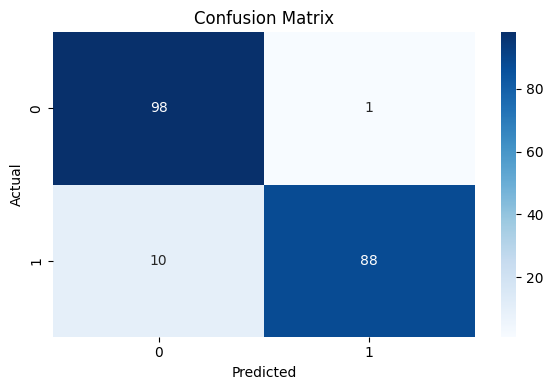

Logistic Regression(confusion matrix):  [[98  1]
 [10 88]]
KNN(accuracy, precision, recall):  (0.6751269035532995, 0.7142857142857143, 0.660377358490566)


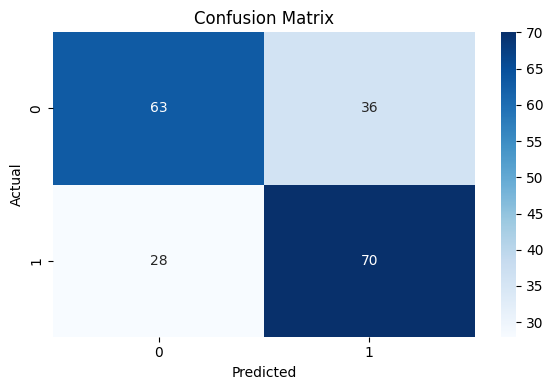

KNN(confusion matrix):  [[63 36]
 [28 70]]
Decision Tree(accuracy, precision, recall):  (0.8934010152284264, 0.8673469387755102, 0.9139784946236559)


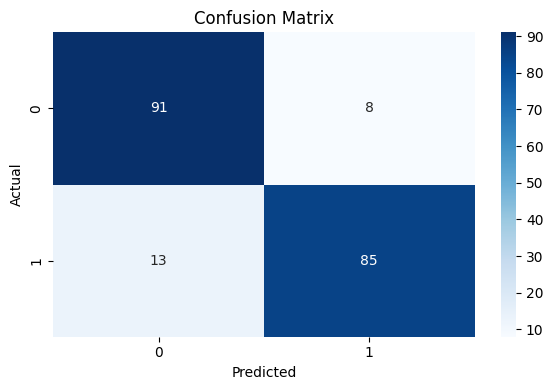

Decision Tree(confusion matrix):  [[91  8]
 [13 85]]
SVC(accuracy, precision, recall):  (0.9137055837563451, 0.826530612244898, 1.0)


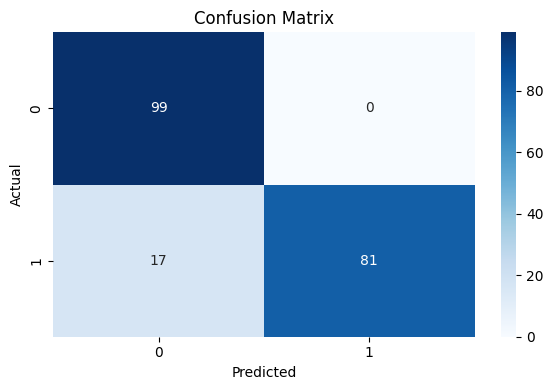

SVC(confusion matrix):  [[99  0]
 [17 81]]
Random Forest(accuracy, precision, recall):  (0.9238578680203046, 0.8673469387755102, 0.9770114942528736)


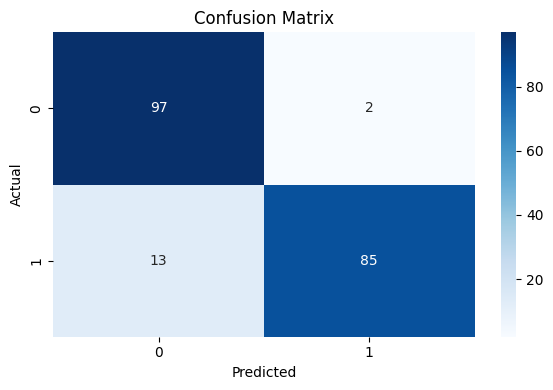

Random Forest(confusion matrix):  [[97  2]
 [13 85]]
Gradient Boosting(accuracy, precision, recall):  (0.9289340101522843, 0.8775510204081632, 0.9772727272727273)


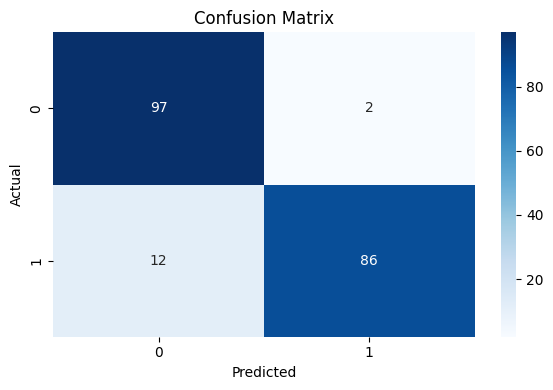

Gradient Boosting(confusion matrix):  [[97  2]
 [12 86]]
AdaBoost(accuracy, precision, recall):  (0.9289340101522843, 0.8775510204081632, 0.9772727272727273)


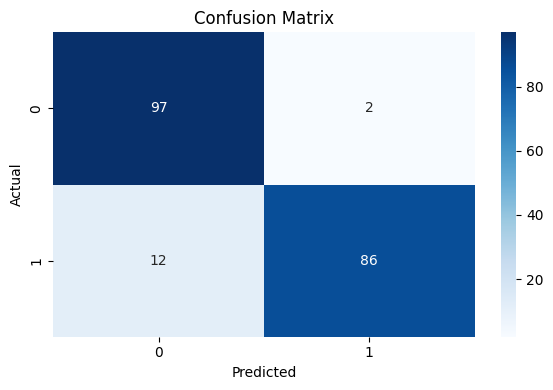

AdaBoost(confusion matrix):  [[97  2]
 [12 86]]
LightGBM(accuracy, precision, recall):  (0.9238578680203046, 0.8673469387755102, 0.9770114942528736)


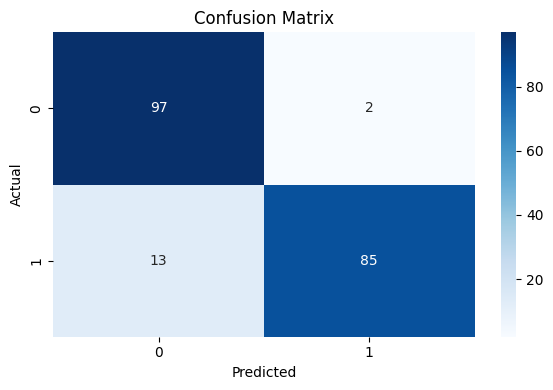

LightGBM(confusion matrix):  [[97  2]
 [13 85]]


In [48]:
def metrics(y_pred, y_test):
  accuracy = accuracy_score(y_pred, y_test)
  precision = precision_score(y_pred, y_test)
  recall = recall_score(y_pred, y_test)
  return accuracy, precision, recall

def confusion(y_pred, y_test, labels=None, title="Confusion Matrix"):
    cm = confusion_matrix(y_test, y_pred, labels=labels)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.tight_layout()
    plt.show()

    return cm

print('Logistic Regression(accuracy, precision, recall): ', metrics(LR_pred, Y_test))
print('Logistic Regression(confusion matrix): ', confusion(LR_pred, Y_test, labels=[0, 1]))
print('KNN(accuracy, precision, recall): ', metrics(KNN_pred, Y_test))
print('KNN(confusion matrix): ', confusion(KNN_pred, Y_test, labels=[0, 1]))
print('Decision Tree(accuracy, precision, recall): ', metrics(dt_best_pred, Y_test))
print('Decision Tree(confusion matrix): ', confusion(dt_best_pred, Y_test, labels=[0, 1]))
print('SVC(accuracy, precision, recall): ', metrics(svc_best_pred, Y_test))
print('SVC(confusion matrix): ', confusion(svc_best_pred, Y_test, labels=[0, 1]))
print('Random Forest(accuracy, precision, recall): ', metrics(rf_best_pred, Y_test))
print('Random Forest(confusion matrix): ', confusion(rf_best_pred, Y_test, labels=[0, 1]))
print('Gradient Boosting(accuracy, precision, recall): ', metrics(gb_best_pred, Y_test))
print('Gradient Boosting(confusion matrix): ', confusion(gb_best_pred, Y_test, labels=[0, 1]))
print('AdaBoost(accuracy, precision, recall): ', metrics(ab_best_pred, Y_test))
print('AdaBoost(confusion matrix): ', confusion(ab_best_pred, Y_test, labels=[0, 1]))
print('LightGBM(accuracy, precision, recall): ', metrics(lgbm_best_pred, Y_test))
print('LightGBM(confusion matrix): ', confusion(lgbm_best_pred, Y_test, labels=[0, 1]))